$$d_{\pm} = \frac{\log(Se^{rT}/K)}{\sigma \sqrt{T - t}} \pm \frac{(\sigma \sqrt{T - t})^{2}}{2}$$

$$K[\frac{S}{Ke^{-rT}} \Phi(d_{+}) - \Phi(d_{-})]$$

$$\frac{S_{T}}{K} = \exp(\log(S_{t}/K) - 0.5 \sigma^{2}(T - t) + \sigma \sqrt{T - t}Z)$$


$$d_{\pm} = \frac{\log(F_{t}/K)}{\sigma \sqrt{T - t}} \pm \frac{(\sigma \sqrt{T - t})}{2}$$


$$K [\frac{F_{t}}{K}\Phi(d_{+}) - \Phi(d_{-})] = F_{t}[\Phi(d_{+}) - \frac{K}{F_{t}}\Phi(d_{-})]$$


$$F_{t}\mathbb{E}^{\mathbb{Q}}[(1 - \frac{K}{F_{T}})^{+} | F_{t}/K, \sigma \sqrt{T - t}]$$


$$d_{-} > 0$$

### PDE

$$V_{t} + rsV_{s} - + \frac{V_{ss}\sigma^{2}s^{2}}{2} - rV = 0$$

$$\frac{\partial \sigma \sqrt{\tau}}{\partial t} = \frac{\sigma^{2}}{2 \sqrt{\tau}}, \frac{\partial \log(S/K)}{\partial s} = \frac{1}{s}, $$

$$-V_{\sigma \sqrt{\tau}}\frac{\sigma^{2}}{2\sigma \sqrt{\tau}} - \frac{\sigma^{2}}{2}V_{x} +  \frac{\sigma^{2}V_{xx}}{2} = 0$$

$$V_{t} + rsV_{s} + \frac{s^{2}V_{ss}\sigma^{2}}{2} - rV = 0$$

$x = \log(S/K), \frac{\partial x}{\partial s} = \frac{1}{s}, \frac{\partial^{2}x}{\partial s^{2}} = \frac{-1}{s^{2}}$

$$V_{\sigma \sqrt{T - t}}\frac{\sigma}{2\sqrt{T - t}} + rsV_{x}\frac{\partial x}{\partial s} + \frac{s^{2}\sigma^{2}}{2}[V_{xx} (\frac{\partial x}{\partial s})^{2} + V_{x} \frac{\partial^{2} x}{\partial s^{2}}] - rV = 0$$

$$V_{\sigma \sqrt{T - t}}\frac{\sigma}{2\sqrt{T - t}} + rsV_{x}\frac{\partial x}{\partial s} + \frac{s^{2}\sigma^{2}}{2}[V_{xx} (\frac{\partial x}{\partial s})^{2} + V_{x} \frac{\partial^{2} x}{\partial s^{2}}] - rV = 0$$

$$-V_{\sigma}\sqrt{T - t} \frac{\sigma}{2\sqrt{T - t}} + (r - \frac{\sigma^{2}}{2})V_{x} + \frac{\sigma^{2}V_{xx}}{2} -rV = 0$$


$$\frac{-V_{\sigma}\sqrt{T - t}}{\sigma \sqrt{T - t}} + (\frac{r}{2\sigma^{2}} - 1)V_{x} + V_{xx} -\frac{r}{2\sigma^{2}}V = 0$$$$V_{t} + rsV_{s} + \frac{s^{2}V_{ss}\sigma^{2}}{2} - rV = 0$$

$x = \log(S/K), \frac{\partial x}{\partial s} = \frac{1}{s}, \frac{\partial^{2}x}{\partial s^{2}} = \frac{-1}{s^{2}}$

$$V_{\sigma \sqrt{T - t}}\frac{\sigma}{2\sqrt{T - t}} + rsV_{x}\frac{\partial x}{\partial s} + \frac{s^{2}\sigma^{2}}{2}[V_{xx} (\frac{\partial x}{\partial s})^{2} + V_{x} \frac{\partial^{2} x}{\partial s^{2}}] - rV = 0$$

$$V_{\sigma \sqrt{T - t}}\frac{\sigma}{2\sqrt{T - t}} + rsV_{x}\frac{\partial x}{\partial s} + \frac{s^{2}\sigma^{2}}{2}[V_{xx} (\frac{\partial x}{\partial s})^{2} + V_{x} \frac{\partial^{2} x}{\partial s^{2}}] - rV = 0$$

$$-V_{\sigma}\sqrt{T - t} \frac{\sigma}{2\sqrt{T - t}} + (r - \frac{\sigma^{2}}{2})V_{x} + \frac{\sigma^{2}V_{xx}}{2} -rV = 0$$


$$\frac{-V_{\sigma}\sqrt{T - t}}{\sigma \sqrt{T - t}} + (\frac{r}{2\sigma^{2}} - 1)V_{x} + V_{xx} -\frac{r}{2\sigma^{2}}V = 0$$

$V_{K} = V_{x}\frac{\partial x}{\partial K} = -\frac{V_{x}}{K}, V_{KK} = \frac{V_{xx}}{K^{2}} + \frac{V_{x}}{K^{2}}$

Thus we require: $V_{x} \geq 0, V_{xx} \geq 0, V_{\tau} \geq 0$

$V(-\infty, \sqrt{\tau}) = 0, V(x, 0) = (x - 1)^{+}$


$$x = \frac{\log(S/K)}{\sigma \sqrt{T - t}}, \frac{\partial}{\partial S} = \frac{1}{sy}, \frac{\partial}{t} = \frac{\log(S/K) \sigma^{2}}{2y}$$

In [27]:
%run examples/key_imports.py
%run examples/bs.py
%run examples/nn_archi.py
%run examples/utils.py

# Generate Dataset

In [137]:
"""
Fix Random Seed
"""
SEED = 42
rng = default_rng(SEED)

"""
Fix Terminal maturity
"""

T = 1
N_TIMES = 32
dt = T / N_TIMES
ts = np.linspace(0, T, N_TIMES + 1)

"""
Define State Variables
"""
N_SAMPLES = 2048
SKs = rng.uniform(-3, 1, N_SAMPLES) # log-moneyness
sigma = rng.uniform(1e-6, 1, N_SAMPLES) # volatilty


"""
Define Brownian Increments
"""
W = rng.standard_normal((N_SAMPLES, N_TIMES)) * np.sqrt(dt)

"""
Simulate St paths
"""
Sts = np.zeros((N_SAMPLES, N_TIMES + 1))
Sts[:, 0] = SKs
deltas = np.zeros((N_SAMPLES, N_TIMES + 1))
vegas = np.zeros((N_SAMPLES, N_TIMES + 1))
for i in range(N_TIMES):
    Sts[:,i + 1] = gbm_step(Sts[:,i], dt, sigma, W[:,i])
    vec_fun = lambda x, dt, sigma, w: grad(gbm_step, argnums = 0)(x, dt, sigma, w)
    deltas[:, i] = jnp.vectorize(vec_fun)(Sts[:,i], dt, sigma, W[:,i])
bs_call_payoff = lambda x: jnp.maximum(jnp.exp(x) - 1.0, 0)
y = np.array(bs_call_payoff(Sts[:,-1]))
deltas[:, -1] = jnp.vectorize(grad(bs_call_payoff))(Sts[:, -1])
final_grad = jnp.vectorize(grad(bs_call_payoff))(Sts[:,-1])
deltas = np.cumprod(deltas[:, ::-1], axis = 1) * np.array(final_grad).reshape((-1, 1))

"""
Combine to create dataset
"""

feat_names = ['log(S/K)', 'ttm']
f_to_i = lambda x: feat_names.index(x)

# Fix terminal payoff, go forward in time
y = np.maximum(np.exp(Sts[:,-1]) - 1, 0)
Xs = np.vstack([Sts[:, :-1].reshape(-1),
                (sigma.reshape((-1, 1)) * np.sqrt(T - ts[:-1])).reshape(-1)
                ]).T
Xs = Xs.astype(np.float32)
ys = np.repeat(y, N_TIMES)

X_df = pd.DataFrame(Xs, columns = feat_names)
X_df['pathwise_delta'] = deltas[:, :-1].reshape(-1)
X_df['call_payoff'] = ys
X_df['call_true'] = jax_BS_call(Xs[:,0], Xs[:,1])
X_df['digital_payoff'] = (ys > 0) * 1
X_df['digital_true'] = jax_BS_digital(Xs[:,0], Xs[:,1])
X_df['true_d_log(S/K)'], X_df['true_d_ttm'] = first_order_greeks(Xs)
X_df['true_d2_log(S/K)'] = second_order_greek(Xs)
X_df['path'] = X_df.index // N_TIMES


print(Xs.shape, ys.shape)
assert Xs.shape[0] == ys.shape[0]
X_df.to_csv("bs.csv", index=False)
display(X_df)

(65536, 2) (65536,)


,log(S/K),ttm,pathwise_delta,call_payoff,call_true,digital_payoff,digital_true,true_d_log(S/K),true_d_ttm,true_d2_log(S/K),path
0,0.095824,0.146744,1.51132,0.229357,1.243302e-01,1,7.189180e-01,8.432480e-01,3.372524e-01,3.141483e+00,0
1,0.102578,0.144433,1.51132,0.229357,1.293414e-01,1,7.382615e-01,8.676028e-01,3.254791e-01,3.121096e+00,0
2,0.160319,0.142084,1.51132,0.229357,1.838535e-01,1,8.548112e-01,1.038665e+00,2.281222e-01,2.644206e+00,0
3,0.197072,0.139696,1.51132,0.229357,2.233434e-01,1,9.100192e-01,1.133362e+00,1.623651e-01,2.295636e+00,0
4,0.188758,0.137267,1.51132,0.229357,2.135811e-01,1,9.043070e-01,1.117888e+00,1.699253e-01,2.355812e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
65531,-0.841867,0.127759,0.00000,0.000000,2.687234e-13,0,1.432367e-11,1.459434e-11,9.737861e-11,7.767978e-10,2047
65532,-0.832462,0.114271,0.00000,0.000000,1.604287e-15,0,1.051338e-13,1.067386e-13,7.857384e-13,6.982788e-12,2047
65533,-0.875811,0.098962,0.00000,0.000000,3.079335e-21,0,2.805760e-19,2.837034e-19,2.528183e-18,2.583044e-17,2047
65534,-0.868903,0.080802,0.00000,0.000000,1.363924e-29,0,1.839564e-27,1.852612e-27,2.001728e-26,2.495884e-25,2047


Text(0.5, 1.0, 'Sample payoffs vs strike')

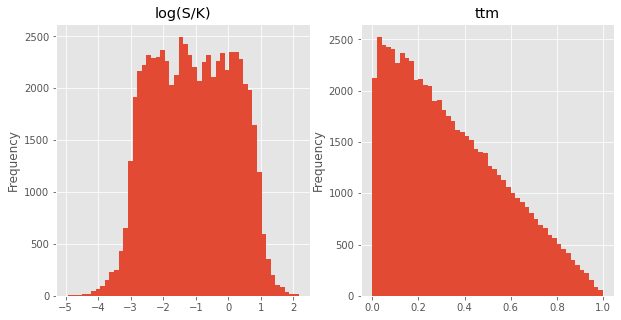

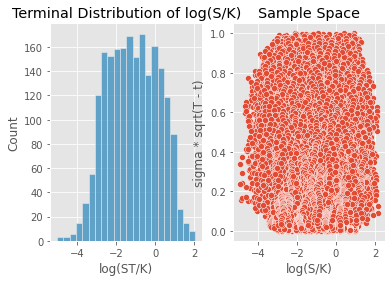

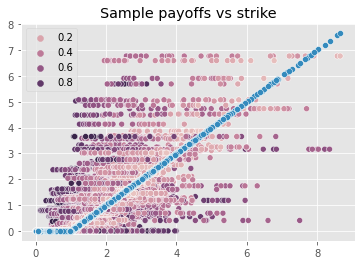

In [66]:
"""
Visualise data
"""
# Marginal Distributions of Parameter Space
fig, ax = plt.subplots(figsize=(5 * len(feat_names), 5), ncols = len(feat_names))
for i in range(len(feat_names)):
    X_df.iloc[:, i].plot(kind = 'hist', ax = ax[i], bins = 50)
    ax[i].set_title(feat_names[i])
# Terminal Distribution of underlying
fig, ax = plt.subplots(ncols = 2)
sns.scatterplot(x = Xs[:, f_to_i("log(S/K)")], y = Xs[:, f_to_i("ttm")], ax = ax[1])
sns.histplot(Sts[:, -1], ax = ax[0])
ax[0].set_title("Terminal Distribution of log(S/K)")
ax[0].set_xlabel("log(ST/K)")
ax[1].set_title("Sample Space")
ax[1].set_xlabel("log(S/K)")
ax[1].set_ylabel("sigma * sqrt(T - t)")
# sample payoff, intrinsic val v S/K

fig, ax = plt.subplots()
intrinsic_val = np.maximum(np.exp(Xs[:,f_to_i("log(S/K)")]) - 1.0, 0)
sns.scatterplot(x = np.exp(Xs[:,f_to_i("log(S/K)")]), y = ys, hue = Xs[:, f_to_i("ttm")])
sns.scatterplot(x = np.exp(Xs[:,f_to_i("log(S/K)")]), y = intrinsic_val)
ax.set_title("Sample payoffs vs strike")

# Prediction - European Calls

In [22]:
HIDDEN_UNITS = 100
LAYERS = 2
dropout_ratio = 0.0
HIDDEN_ACT = 'softplus'
N_FEATS = 2
OUTPUT_ACT = 'softplus'
DROPOUT_RATIO = 0.0
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
BATCH_NORM = False

loss_fn = tf.keras.losses.MeanSquaredError()

METRICS = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
VAL_SPLIT = 0.2
CALLBACKS = [EarlyStopping(patience=5)]


opt = Adam(learning_rate = LR)
ffn = make_model(N_FEATS, 
                 HIDDEN_UNITS, 
                 LAYERS, 
                 DROPOUT_RATIO, 
                 HIDDEN_ACT, 
                 OUTPUT_ACT, 
                 BATCH_NORM)


ffn.compile(optimizer=opt, loss=loss_fn, metrics = METRICS)
print(np.mean((ys - ys.mean()) ** 2))
print(np.mean(np.abs(ys - ys.mean())))
history = ffn.fit(Xs, ys, 
                  epochs = EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_split = VAL_SPLIT,
                  shuffle=True,
                  callbacks=CALLBACKS)

3.9541637862292704
1.2642633719875587
Epoch 1/10
1639/1639 [==============================] - 4s 2ms/step - loss: 1.2714 - mean_absolute_error: 0.4282 - root_mean_squared_error: 1.1276 - val_loss: 0.8224 - val_mean_absolute_error: 0.3430 - val_root_mean_squared_error: 0.9068
Epoch 2/10
1639/1639 [==============================] - 3s 2ms/step - loss: 1.1318 - mean_absolute_error: 0.3797 - root_mean_squared_error: 1.0638 - val_loss: 0.8253 - val_mean_absolute_error: 0.3748 - val_root_mean_squared_error: 0.9085
Epoch 3/10
1639/1639 [==============================] - 3s 2ms/step - loss: 1.0889 - mean_absolute_error: 0.3837 - root_mean_squared_error: 1.0435 - val_loss: 0.8657 - val_mean_absolute_error: 0.4128 - val_root_mean_squared_error: 0.9304
Epoch 4/10
1639/1639 [==============================] - 3s 2ms/step - loss: 1.0704 - mean_absolute_error: 0.3982 - root_mean_squared_error: 1.0346 - val_loss: 0.8353 - val_mean_absolute_error: 0.3720 - val_root_mean_squared_error: 0.9139
Epoch 5/10

## Prediction Errors - European Calls

In [46]:
%run examples/utils.py

,0
pred_l1,0.135357
pred_l2,0.355636
pred_l_inf,6.647658
pred_lower_bound_violation,0.000000
PDE_mean,-0.284715
PDE_l1,1.020497
PDE_l2,2.824898
PDE_l_inf,23.988934
no_arbmonotonicity_error,0.000000
no_arbtime_value_error,0.255783


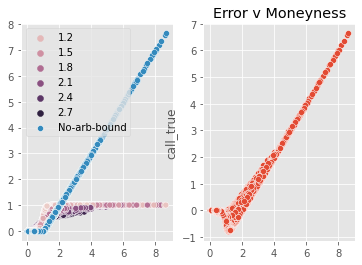

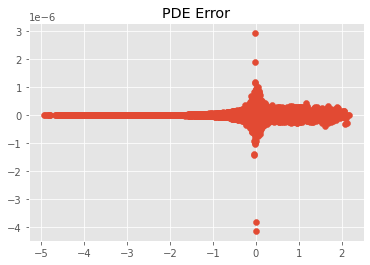

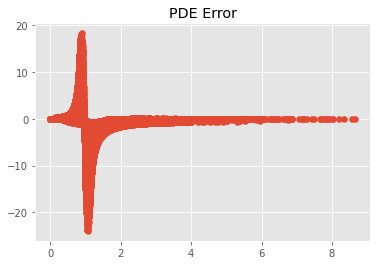

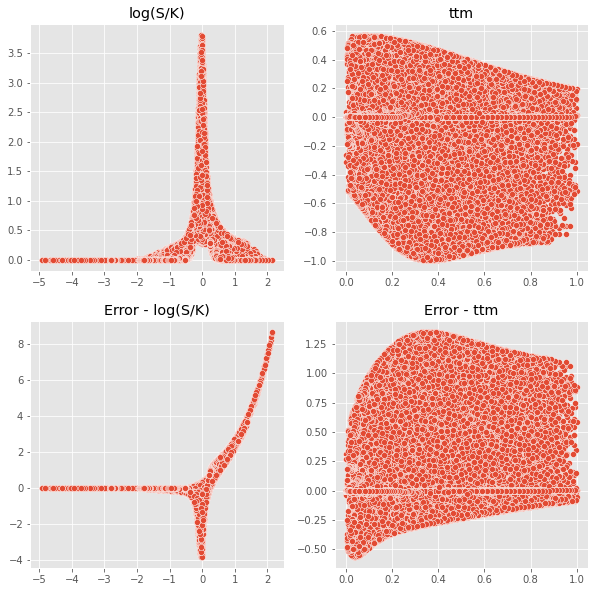

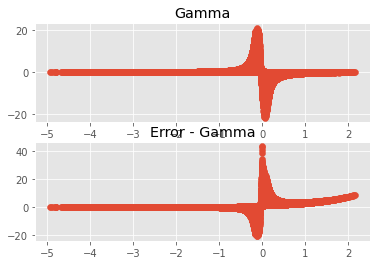

In [80]:
"""
Prediction Errors
"""
model = ffn
moneyness = np.exp(Xs[:, f_to_i("log(S/K)")])
ttm = np.exp(Xs[:, f_to_i("ttm")])
true = X_df['call_true']
intrinsic_val = np.maximum(moneyness - 1.0, 0)
preds = model.predict(Xs)
try:
    preds = preds.reshape(-1)
except:
    pass

plot_preds(moneyness = moneyness, ttm = ttm, lower_bound = intrinsic_val, true = true, preds = preds)

SK = np.linspace(-2, 3, 128) 
ts = np.linspace(0, 4, 128)
X = np.array(list(product(SK, ts)))
visualise_surface(SK, ts, model(X).numpy())
"""
Compute all Gradients, Hessian
"""

X_tensor = tf.Variable(Xs)
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape:
        output = model(X_tensor)
        grads = tape.gradient(output, X_tensor)
    hessian1 = tape2.gradient(grads[:, f_to_i("log(S/K)")], X_tensor)
    
"""
Error in PDE operator (Dynamic Arbitrage)
"""

true_pde_err = bs_pde_err(X_df['log(S/K)'], X_df['ttm'], 
                          X_df['true_d_ttm'], 
                          X_df['true_d_log(S/K)'], 
                          X_df['true_d2_log(S/K)'])
assert np.allclose(np.mean(true_pde_err), 0)
PDE_err = bs_pde_err(moneyness, ttm, 
                     grads[:, f_to_i("ttm")], 
                     grads[:, f_to_i("log(S/K)")], 
                     hessian1[:, f_to_i("log(S/K)")])

"""
Error in Greeks
"""
true_first_order = X_df[['true_d_log(S/K)', 'true_d_ttm']].values
fig, ax = plt.subplots(ncols = Xs.shape[1], figsize=(5 * Xs.shape[1], 10), nrows=2)
for i in range(Xs.shape[1]):
    sns.scatterplot(x = Xs[:,i], y = grads[:, i], ax = ax[0, i])
    ax[0, i].set_title(feat_names[i])
    sns.scatterplot(x = Xs[:,i], y = true_first_order[:, i] - grads[:, i], ax = ax[1, i])
    ax[1, i].set_title(f"Error - {feat_names[i]}")
    
    
fig, ax = plt.subplots(nrows = 2)
true_second_order = X_df['true_d2_log(S/K)'].values
ax[0].scatter(Xs[:, f_to_i("log(S/K)")], hessian1[:, f_to_i("log(S/K)")])
ax[0].set_title("Gamma")
ax[1].scatter(Xs[:, f_to_i("log(S/K)")], true_second_order - hessian1[:, f_to_i("log(S/K)")])
ax[1].set_title(f"Error - Gamma")


"""
Display Statistics
"""
res = pd.concat([pd.DataFrame([diagnosis_pred(true, preds, 0)], index=[0]).add_prefix("pred_"),
           pd.DataFrame(diagnosis_pde(PDE_err), index = [0]).add_prefix("PDE_"),
           pd.DataFrame(diagnosis_grads(hessian1, grads, f_to_i, "ttm", "log(S/K)"), index=[0]).add_prefix("no_arb")], axis = 1)
display(res.T)

<AxesSubplot:xlabel='log(S/K)'>

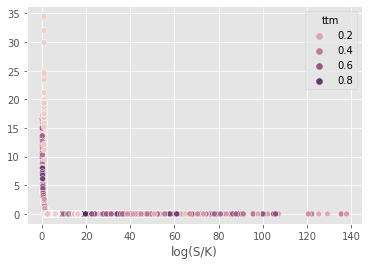

In [87]:
sns.scatterplot(x = np.exp(-X_df['log(S/K)']), 
                y = X_df['true_d_log(S/K)'] + 
                X_df['true_d2_log(S/K)'], hue = X_df['ttm'])

## Prediction - European Digitals

In [88]:
HIDDEN_UNITS = 100
LAYERS = 2
dropout_ratio = 0.0
HIDDEN_ACT = 'softplus'
N_FEATS = 2
OUTPUT_ACT = 'sigmoid'
DROPOUT_RATIO = 0.0
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
BATCH_NORM = False

loss_fn = tf.keras.losses.BinaryCrossentropy()

METRICS = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
VAL_SPLIT = 0.2
CALLBACKS = [EarlyStopping(patience=5)]


opt = Adam(learning_rate = LR)
ffn = make_model(N_FEATS, 
                 HIDDEN_UNITS, 
                 LAYERS, 
                 DROPOUT_RATIO, 
                 HIDDEN_ACT, 
                 OUTPUT_ACT, 
                 BATCH_NORM)


ffn.compile(optimizer=opt, loss=loss_fn, metrics = METRICS)
print(np.mean((ys - ys.mean()) ** 2))
print(np.mean(np.abs(ys - ys.mean())))
history = ffn.fit(Xs, X_df['digital_payoff'].values, 
                  epochs = EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_split = VAL_SPLIT,
                  shuffle=True,
                  callbacks=CALLBACKS)

0.3969143075984094
0.3450840305446676
Epoch 1/10
1639/1639 [==============================] - 4s 2ms/step - loss: 0.1941 - mean_absolute_error: 0.1212 - root_mean_squared_error: 0.2419 - val_loss: 0.1404 - val_mean_absolute_error: 0.0903 - val_root_mean_squared_error: 0.2067
Epoch 2/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.1750 - mean_absolute_error: 0.1053 - root_mean_squared_error: 0.2288 - val_loss: 0.1370 - val_mean_absolute_error: 0.0931 - val_root_mean_squared_error: 0.2025
Epoch 3/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.1704 - mean_absolute_error: 0.1040 - root_mean_squared_error: 0.2267 - val_loss: 0.1295 - val_mean_absolute_error: 0.0853 - val_root_mean_squared_error: 0.1987
Epoch 4/10
1639/1639 [==============================] - 6s 4ms/step - loss: 0.1582 - mean_absolute_error: 0.0984 - root_mean_squared_error: 0.2202 - val_loss: 0.1258 - val_mean_absolute_error: 0.0901 - val_root_mean_squared_error: 0.1966
Epoch 5/10

,0
pred_l1,0.021354
pred_l2,0.045834
pred_l_inf,0.597616
pred_lower_bound_violation,0.000000
PDE_mean,0.005041
PDE_l1,0.167926
PDE_l2,0.378390
PDE_l_inf,11.614323


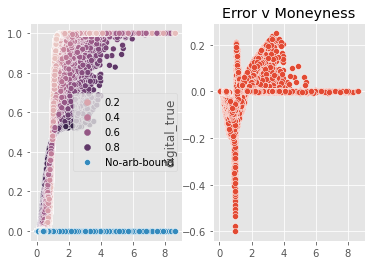

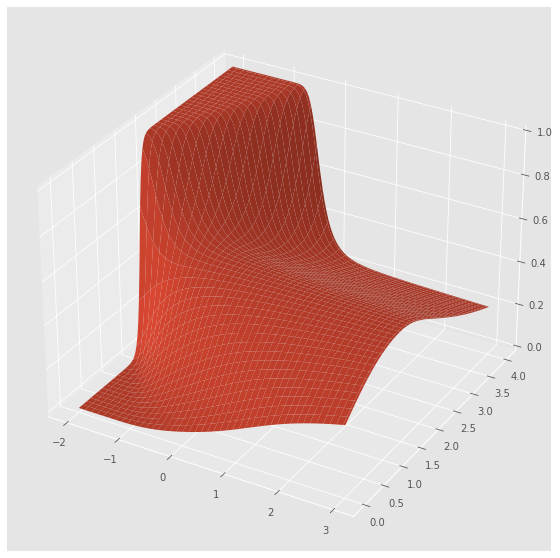

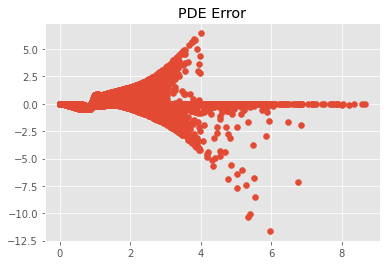

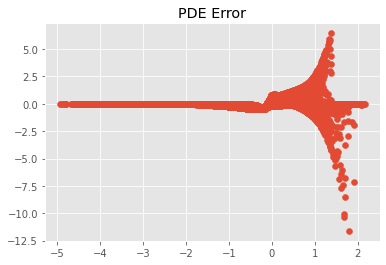

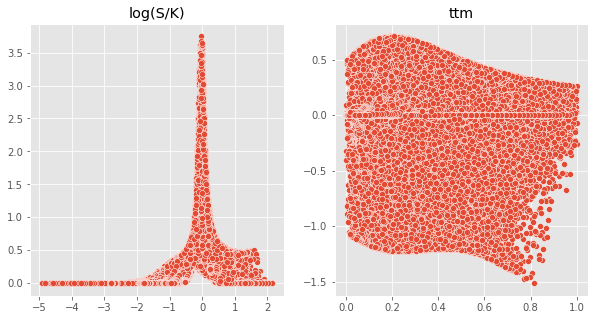

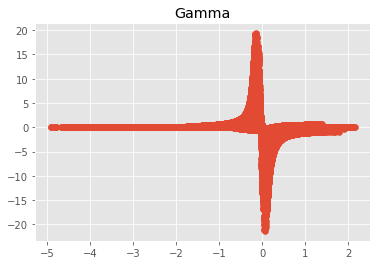

In [153]:
"""
Prediction Errors
"""
model = ffn
moneyness = np.exp(Xs[:, f_to_i("log(S/K)")])
true = X_df['digital_true']
intrinsic_val = 0.0
preds = model.predict(Xs)
try:
    preds = preds.reshape(-1)
except:
    pass

# plot predictions vs lower bound
fig, ax = plt.subplots(ncols = 2)
sns.scatterplot(moneyness, preds, hue = Xs[:, f_to_i("ttm")], label=None, ax = ax[0])
sns.scatterplot(x = moneyness, y = intrinsic_val, label = "No-arb-bound", ax = ax[0]);
sns.scatterplot(moneyness, true - preds, ax = ax[1])
ax[1].set_title("Error v Moneyness")

SK = np.linspace(-2, 3, 128) 
ts = np.linspace(0, 4, 128)
X = np.array(list(product(SK, ts)))
visualise_surface(SK, ts, model(X).numpy())
"""
Compute all Gradients, Hessian
"""

X_tensor = tf.Variable(Xs)
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape:
        output = model(X_tensor)
        grads = tape.gradient(output, X_tensor)
    hessian1 = tape2.gradient(grads[:, f_to_i("log(S/K)")], X_tensor)
    
"""
Error in PDE operator (Dynamic Arbitrage)
"""
PDE_err = bs_pde_err(moneyness, X_df['ttm'], 
                     grads[:, f_to_i("ttm")], 
                     grads[:, f_to_i("log(S/K)")], 
                     hessian1[:, f_to_i("log(S/K)")])

fig, ax = plt.subplots()
ax.scatter(Xs[:, f_to_i("log(S/K)")], PDE_err)
ax.set_title("PDE Error")

"""
Error in Greeks
"""
true_first_order = X_df[['true_d_log(S/K)', 'true_d_ttm']].values
fig, ax = plt.subplots(ncols = Xs.shape[1], figsize=(5 * Xs.shape[1], 5), nrows=1)
for i in range(Xs.shape[1]):
    sns.scatterplot(x = Xs[:,i], y = grads[:, i], ax = ax[i])
    ax[i].set_title(feat_names[i])
    
# gamma  
fig, ax = plt.subplots(nrows = 1)
true_second_order = X_df['true_d2_log(S/K)'].values
ax.scatter(Xs[:, f_to_i("log(S/K)")], hessian1[:, f_to_i("log(S/K)")])
ax.set_title("Gamma")



"""
Display Statistics
"""
res = pd.concat([pd.DataFrame([diagnosis_pred(true, preds, 0)], index=[0]).add_prefix("pred_"),
           pd.DataFrame(diagnosis_pde(PDE_err), index = [0]).add_prefix("PDE_")], 
                axis = 1)
display(res.T)

# Polynomial Basis

<AxesSubplot:>

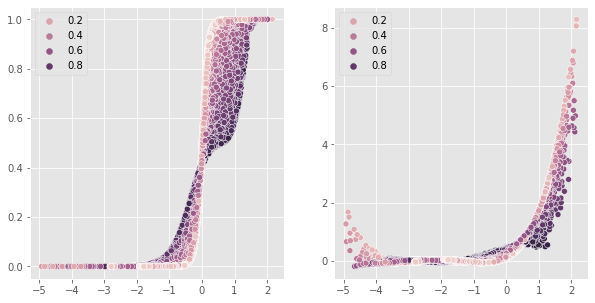

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
X2 = PolynomialFeatures(degree=5).fit_transform(Xs)

reg = LinearRegression(fit_intercept=False).fit(X2, X_df['call_payoff'])
logit_reg = LogisticRegression(fit_intercept=False).fit(X2, X_df['digital_payoff'])

fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
sns.scatterplot(x = Xs[:, f_to_i("log(S/K)")], 
                y = logit_reg.predict_proba(X2)[:,1], 
                hue = Xs[:, f_to_i("ttm")], ax = ax[0])

sns.scatterplot(x = Xs[:, f_to_i("log(S/K)")], 
                y = reg.predict(X2), 
                hue = Xs[:, f_to_i("ttm")], ax = ax[1])

# NN with a homogeneity hint

In [129]:
"""
NN Parameters
"""
N_FEATS = 2


"""
Training Parameters
"""
loss_fn = tf.keras.losses.MeanSquaredError()
METRICS = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
VAL_SPLIT = 0.2
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
CALLBACKS = [EarlyStopping(patience=5)]


opt = Adam(learning_rate = LR)
model = homogeneity_network(2)
intrinsic_value = np.maximum(np.exp(Xs[:,0]) - 1.0 ,0 )
model.compile(optimizer=opt, loss=loss_fn, metrics = METRICS, loss_weights = (intrinsic_value < X_df['call_payoff'].values) * 1.0)
print(np.mean((ys - ys.mean()) ** 2))
print(np.mean(np.abs(ys - ys.mean())))
history = model.fit([Xs[:,0], Xs[:,1]], 
                    X_df['call_payoff'].values - intrinsic_value, 
                  epochs = EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_split = VAL_SPLIT,
                  shuffle=True,
                  callbacks=CALLBACKS)

0.3969143075984094
0.3450840305446676
Epoch 1/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0204 - mean_absolute_error: 0.1269 - root_mean_squared_error: 0.3945 - val_loss: 0.0166 - val_mean_absolute_error: 0.1238 - val_root_mean_squared_error: 0.3560
Epoch 2/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0204 - mean_absolute_error: 0.1278 - root_mean_squared_error: 0.3942 - val_loss: 0.0166 - val_mean_absolute_error: 0.1206 - val_root_mean_squared_error: 0.3561
Epoch 3/10
1639/1639 [==============================] - 5s 3ms/step - loss: 0.0204 - mean_absolute_error: 0.1269 - root_mean_squared_error: 0.3943 - val_loss: 0.0166 - val_mean_absolute_error: 0.1251 - val_root_mean_squared_error: 0.3559
Epoch 4/10
1639/1639 [==============================] - 3s 2ms/step - loss: 0.0204 - mean_absolute_error: 0.1272 - root_mean_squared_error: 0.3942 - val_loss: 0.0166 - val_mean_absolute_error: 0.1230 - val_root_mean_squared_error: 0.3559
Epoch 5/10

KeyboardInterrupt: 

,0
pred_l1,0.025579
pred_l2,0.044672
pred_l_inf,0.355580
pred_lower_bound_violation,0.000000
PDE_mean,-0.001644
PDE_l1,0.001644
PDE_l2,0.002108
PDE_l_inf,0.006991


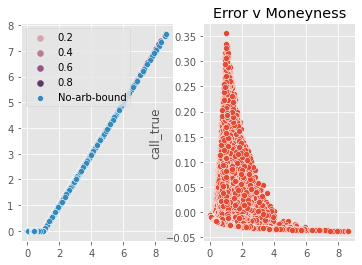

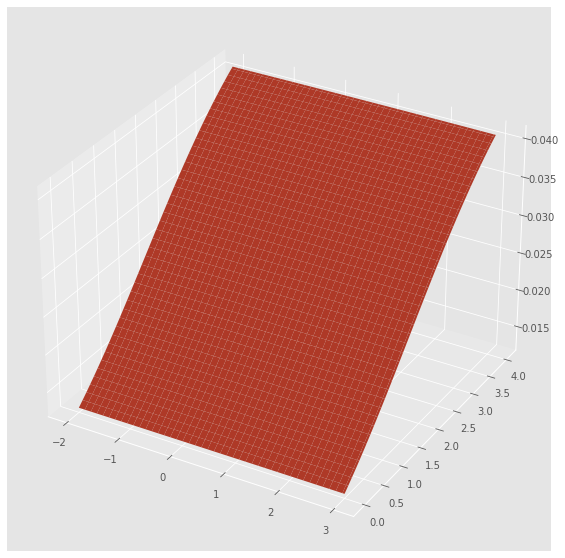

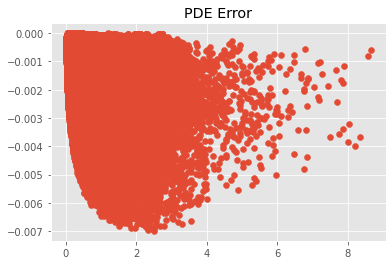

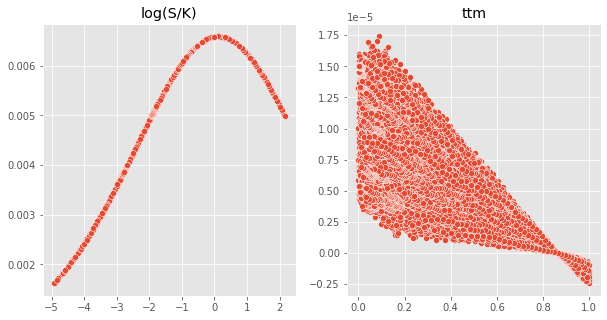

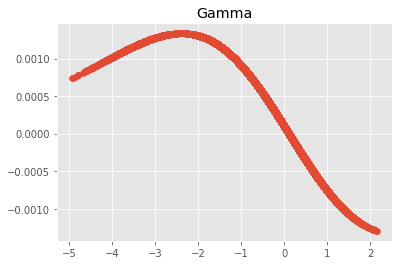

In [150]:
"""
Prediction Errors
"""
moneyness = np.exp(Xs[:, f_to_i("log(S/K)")])
true = X_df['call_true']
intrinsic_val = np.maximum(moneyness - 1.0, 0)
preds = (model.predict([Xs[:,0], Xs[:,1]]).reshape(-1) + intrinsic_val).reshape(-1)

# plot predictions vs lower bound
fig, ax = plt.subplots(ncols = 2)
sns.scatterplot(moneyness, preds, hue = Xs[:, f_to_i("ttm")], label=None, ax = ax[0])
sns.scatterplot(x = moneyness, y = intrinsic_val, label = "No-arb-bound", ax = ax[0]);
sns.scatterplot(moneyness, true - preds, ax = ax[1])
ax[1].set_title("Error v Moneyness")

# Visualise Predictions
SK = np.linspace(-2, 3, 128) 
ts = np.linspace(0, 4, 128)
X = np.array(list(product(SK, ts)))
visualise_surface(SK, ts, model([X[:,0], X[:,1]]).numpy())
"""
Compute all Gradients, Hessian
"""

X_tensor = tf.Variable(Xs)
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape:
        output = model([X_tensor[:,0], X_tensor[:,1]])
        grads = tape.gradient(output, X_tensor)
    hessian1 = tape2.gradient(grads[:, f_to_i("log(S/K)")], X_tensor)
    
"""
Error in PDE operator (Dynamic Arbitrage)
"""
PDE_err = bs_log_pde_err(moneyness, X_df['ttm'], 
                     grads[:, f_to_i("ttm")], 
                     grads[:, f_to_i("log(S/K)")], 
                     hessian1[:, f_to_i("log(S/K)")])

"""
Error in Greeks
"""
true_first_order = X_df[['true_d_log(S/K)', 'true_d_ttm']].values
fig, ax = plt.subplots(ncols = Xs.shape[1], figsize=(5 * Xs.shape[1], 5), nrows=1)
for i in range(Xs.shape[1]):
    sns.scatterplot(x = Xs[:,i], y = grads[:, i], ax = ax[i])
    ax[i].set_title(feat_names[i])
    
# gamma  
fig, ax = plt.subplots(nrows = 1)
true_second_order = X_df['true_d2_log(S/K)'].values
ax.scatter(Xs[:, f_to_i("log(S/K)")], hessian1[:, f_to_i("log(S/K)")])
ax.set_title("Gamma")

"""
Display Statistics
"""
res = pd.concat([pd.DataFrame([diagnosis_pred(true, preds, 0)], index=[0]).add_prefix("pred_"),
           pd.DataFrame(diagnosis_pde(PDE_err), index = [0]).add_prefix("PDE_")], 
                axis = 1)
display(res.T)

In [116]:
2048 * 128

262144

+ https://github.com/DovaX/artificial-neural-networks-in-option-pricing/blob/master/Artifical%20Neural%20Networks%20in%20Option%20Pricing.pdf
